In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import time
import math
import random
import pandas as pd
import matplotlib.image as img
import matplotlib as mpl
import numpy as np
from skimage import io
from random import sample

In [3]:
DATASET_TRAIN_PATH = './DataSet/train/'
DATASET_TEST_PATH = './DataSet/test/'
TRAIN_SIZE = 100

def preprocess_image(image_flat):
    image_view = image_flat.reshape(128,128)
    filtered_image = filters.median(image_view)
    sobel = filters.sobel(filtered_image)
    final_image = sobel.flatten()
    return final_image

def create_df_from_images(ds_path,nbinstances,preprocess=False):
    
    files = os.scandir(ds_path)
    train = pd.DataFrame(columns=['file_name','image','nbfinger','hand'])

    for idx,file in enumerate(files):
        if not file.name.startswith('.') and file.is_file() and file.name.endswith('.png') and idx<nbinstances:
            fname = file.name
            complete_fname = os.path.join(ds_path,fname)
            root,ext = os.path.splitext(fname)
            image = io.imread(complete_fname,as_gray=True)
            flat_image = image.flatten()
            if preprocess: 
                processed_image = preprocess_image(flat_image)
            else:
                processed_image = flat_image
            train.loc[idx,'file_name'] = fname
            train.loc[idx,'image'] = processed_image
            train.loc[idx,'nbfinger'] = root[-2:-1]
            train.loc[idx,'hand'] = root[-1:]
            train.loc[idx,'fingerhand'] = root[-2:]
            
#     train['nbfinger'] = train['nbfinger'].astype('category')
#     train['hand'] = train['hand'].astype('category')
    return train

t1 = time.time()
sample = create_df_from_images(DATASET_TRAIN_PATH,TRAIN_SIZE)
# test = create_df_from_images(DATASET_TEST_PATH,TRAIN_SIZE//5)
t2 = time.time()
print('dataset created in %.2f seconds' %(t2 - t1))

dataset created in 0.48 seconds


In [6]:
sample.loc[0,'image']

array([54, 53, 51, ..., 65, 68, 70], dtype=uint8)

file_name           00b11f87-98be-488b-a1de-2b10e6585936_5L.png
image         [29, 33, 40, 41, 37, 34, 32, 31, 32, 36, 41, 4...
nbfinger                                                      5
hand                                                          L
fingerhand                                                   5L
Name: 48, dtype: object


array([29, 33, 40, ..., 56, 58, 59], dtype=uint8)

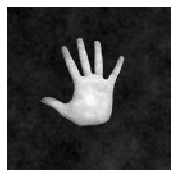

In [7]:
def plot_image(image):
    size = int(math.sqrt(len(image)))
    image_view = image.reshape(size,size)
    plt.imshow(image_view, cmap = mpl.cm.gray);
    plt.axis("off")

randidx = random.randint(0,len(sample))
image = sample.loc[randidx,'image']
print(sample.loc[randidx,:])
plt.figure(figsize=(3,3))
plot_image(image)

image

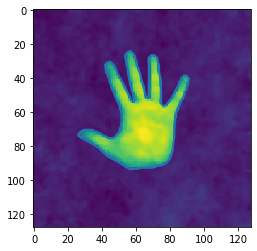

In [8]:
from skimage import measure
from skimage import filters

image_view = image.reshape(128,128)
image_view =filters.median(image_view)

contours = measure.find_contours(image_view, 70)

plt.imshow(image_view, interpolation='nearest')
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.show()

0.46608342198323155
[0. 0. 0. ... 0. 0. 0.]


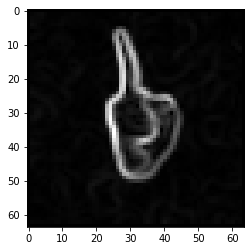

In [78]:
from skimage import filters
from skimage import transform

def plot_image(image):
    size = int(math.sqrt(len(image)))
    image_view = image.reshape(size,size)
    plt.imshow(image_view, cmap = mpl.cm.gray);
#     plt.axis("off")
    
def preprocess_image(image_flat):
    image_view = image_flat.reshape(128,128)
    image_resize = transform.resize(image_view, (64, 64),anti_aliasing=True)
    filtered_image = filters.median(image_resize)
    sobel = filters.sobel(filtered_image)
    final_image = sobel.flatten()
    return final_image


randidx = random.randint(0,len(sample))
image = sample.loc[randidx,'image']
image64 = preprocess_image(image)
plot_image(image64)
print(image64.max())
print(image64)

In [9]:
import skimage

image64 = skimage.transform.resize(sobel, (64, 64))

plt.imshow(image64)

NameError: name 'sobel' is not defined

In [10]:
from skimage import io

mypath='./Image_to_predict/try_to_find.png'
myimage = io.imread(mypath,as_gray=True)

myimage

array([[ 9, 10, 11, ..., 72, 71, 70],
       [ 7,  7,  7, ..., 75, 74, 73],
       [ 8,  8,  7, ..., 78, 76, 75],
       ...,
       [54, 48, 44, ..., 45, 45, 46],
       [67, 58, 44, ..., 43, 43, 43],
       [62, 55, 44, ..., 41, 40, 40]], dtype=uint8)

In [11]:
from skimage import io

mypath='./DATASET/SAMPLE/000cac8e-fcf0-4f8c-bd16-c257d1e6d7a8_2L.png'
myimage2 = io.imread(mypath)

myimage2

array([[52, 53, 56, ..., 49, 48, 48],
       [55, 55, 55, ..., 49, 51, 52],
       [61, 59, 54, ..., 48, 55, 58],
       ...,
       [44, 44, 46, ..., 46, 48, 49],
       [42, 42, 44, ..., 47, 48, 49],
       [41, 41, 42, ..., 48, 48, 48]], dtype=uint8)

array([0., 0., 0., ..., 0., 0., 0.])

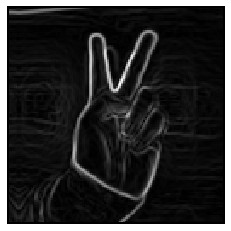

In [186]:
image64 = preprocess_image(myimage.flatten())
plot_image(image64)

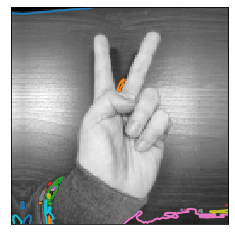

In [177]:
from skimage import measure

image_view = myimage.flatten().reshape(128,128)

contours = measure.find_contours(image_view, 50)

plt.imshow(image_view, interpolation='nearest')
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.axis('image')
plt.xticks([])
plt.yticks([])
plt.show()


In [1]:
from skimage import io

# mypath='./Image_to_predict/try_to_find.png'
mypath='./Image_to_predict/IMG_20200210_142355.jpg'
myimage = io.imread(mypath)

myimage

array([[[ 55,  59,  68],
        [ 55,  59,  68],
        [ 53,  57,  66],
        ...,
        [ 47,  51,  60],
        [ 46,  50,  59],
        [ 47,  51,  60]],

       [[ 55,  59,  68],
        [ 58,  62,  71],
        [ 49,  53,  62],
        ...,
        [ 47,  51,  60],
        [ 45,  49,  58],
        [ 48,  52,  61]],

       [[ 55,  59,  68],
        [ 51,  55,  64],
        [ 51,  55,  64],
        ...,
        [ 45,  49,  58],
        [ 47,  51,  60],
        [ 50,  54,  63]],

       ...,

       [[ 98,  82,  59],
        [ 94,  78,  55],
        [ 94,  77,  57],
        ...,
        [ 29,  24,  18],
        [ 29,  24,  18],
        [ 33,  28,  22]],

       [[101,  85,  62],
        [111,  95,  72],
        [117, 101,  78],
        ...,
        [ 26,  21,  17],
        [ 29,  24,  20],
        [ 26,  21,  17]],

       [[114,  98,  75],
        [117, 101,  78],
        [120, 104,  81],
        ...,
        [ 28,  23,  19],
        [ 28,  23,  19],
        [ 27,  22,  18]]

In [2]:
from skimage import io

mypath='./DATASET/SAMPLE/000cac8e-fcf0-4f8c-bd16-c257d1e6d7a8_2L.png'
myimage2 = io.imread(mypath)

myimage2

array([[52, 53, 56, ..., 49, 48, 48],
       [55, 55, 55, ..., 49, 51, 52],
       [61, 59, 54, ..., 48, 55, 58],
       ...,
       [44, 44, 46, ..., 46, 48, 49],
       [42, 42, 44, ..., 47, 48, 49],
       [41, 41, 42, ..., 48, 48, 48]], dtype=uint8)

In [4]:
randidx = random.randint(0,len(sample))
myimage3 = sample.loc[randidx,'image']
myimage3 = myimage3.reshape(128,128)

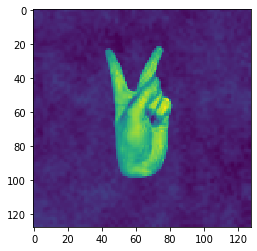

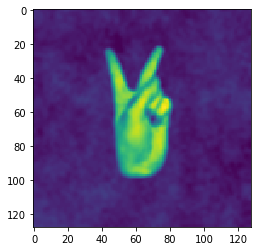

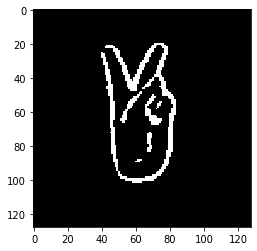

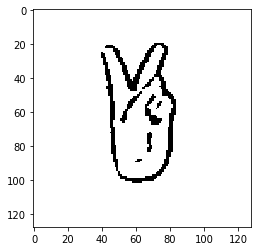

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2

img = myimage3
plt.imshow(img)
plt.show()
img = cv2.GaussianBlur(img, (3,3), 1)
plt.imshow(img)
plt.show()
img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 9)
plt.imshow(img,cmap = mpl.cm.gray)
plt.show()
ret, new = cv2.threshold(img, 25, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(new,cmap = mpl.cm.gray)
plt.show()


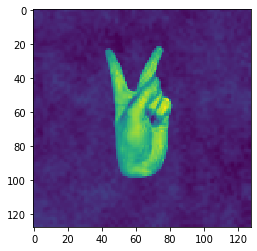

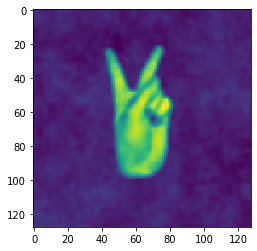

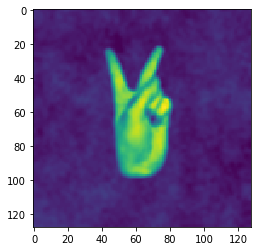

In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
from skimage import filters

img = myimage3
plt.imshow(img)
plt.show()
# img = cv2.GaussianBlur(img, (3,3), 1)
img = filters.gaussian(img, sigma=3, truncate=1/3)
plt.imshow(img)
plt.show()

# img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 9)
# plt.imshow(img,cmap = mpl.cm.gray)
# plt.show()
# ret, new = cv2.threshold(img, 25, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# plt.imshow(new,cmap = mpl.cm.gray)
# plt.show()

In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl

img = cv2.imread('./Dataset/sample/000cac8e-fcf0-4f8c-bd16-c257d1e6d7a8_2L.png',cv2.IMREAD_GRAYSCALE)

# img = cv2.cvtColor(img, code=cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, ksize=(7,7), sigmaX=2)
img = cv2.adaptiveThreshold(img, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY_INV, blockSize=13, C=2)
ret, img = cv2.threshold(img, thresh=25, maxval=255, type=cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(img,cmap = mpl.cm.gray)

NameError: name 'mpl' is not defined